In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from math import ceil

In [2]:
train_data = pd.read_csv(r'../datasets/train_data.csv')
validation_data = pd.read_csv(r'../datasets/validation_data.csv')
test_data = pd.read_csv(r'../datasets/test_data.csv')

In [3]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales
0,category_2,117610,11/6/2021,7
1,category_4,836584,11/18/2021,16
2,category_1,370195,1/24/2022,6
3,category_2,172582,10/30/2021,5
4,category_2,1006009,10/30/2021,5


In [4]:
category_codes = np.unique(train_data['CategoryCode'].values)
dict_categories = {}

for i in range(len(category_codes)):
    dict_categories[category_codes[i]] = i

In [5]:
item_codes = np.unique(train_data['ItemCode'].values)
dict_item_codes = {}

for i in range(len(item_codes)):
    dict_item_codes[item_codes[i]] = i

In [6]:
def string_to_date(d):
    return datetime(int(d.split('/')[2]), int(d.split('/')[0]), int(d.split('/')[1]))

In [7]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_annual_week_id(date):
    return pd.Period(date).week

def get_monthly_week_id(date):
    first_day = date.replace(day=1)

    dom = date.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

def get_category_id(id):
    return dict_categories[id]

def get_item_code_id(id):
    return dict_item_codes[id]
    

In [8]:
train_data['WeekID'] = train_data['DateID'].apply(get_annual_week_id)
train_data['DateID'] = train_data['DateID'].apply(string_to_date)

In [9]:
train_data['MonthID'] = train_data['DateID'].apply(get_month)
train_data['Year'] = train_data['DateID'].apply(get_year)
train_data['WeekIDofMonth'] = train_data['DateID'].apply(get_monthly_week_id)
train_data['ItemCode'] = train_data['ItemCode'].apply(get_item_code_id)
train_data['CategoryCode'] = train_data['CategoryCode'].apply(get_category_id)

In [10]:
train_data.head()

,CategoryCode,ItemCode,DateID,DailySales,WeekID,MonthID,Year,WeekIDofMonth
0,1,46,2021-11-06,7,44,11,2021,1
1,3,90,2021-11-18,16,46,11,2021,3
2,0,75,2022-01-24,6,4,1,2022,5
3,1,62,2021-10-30,5,43,10,2021,5
4,1,109,2021-10-30,5,43,10,2021,5


In [11]:
train_data.shape

(19921, 8)

In [12]:
group_by_week = train_data.groupby(['WeekID', 'CategoryCode', 'ItemCode', 'MonthID', 'Year', 'WeekIDofMonth'])['DailySales'].sum().reset_index()

In [13]:
group_by_week.head()

,WeekID,CategoryCode,ItemCode,MonthID,Year,WeekIDofMonth,DailySales
0,1,0,0,1,2022,2,83
1,1,0,1,1,2022,2,66
2,1,0,5,1,2022,2,21
3,1,0,6,1,2022,2,621
4,1,0,10,1,2022,2,31


In [14]:
group_by_week.describe()

,WeekID,CategoryCode,ItemCode,MonthID,Year,WeekIDofMonth,DailySales
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000
mean,33.474053,0.918654,95.466573,7.698691,2021.339411,2.980131,34.234923
std,19.725594,0.867097,55.610007,4.676653,0.473565,1.507623,69.277279
min,1.000000,0.000000,0.000000,1.000000,2021.000000,1.000000,1.000000
25%,5.000000,0.000000,47.250000,1.000000,2021.000000,2.000000,7.000000
50%,43.000000,1.000000,95.000000,10.000000,2021.000000,3.000000,15.000000
75%,48.000000,1.000000,143.000000,11.000000,2022.000000,4.000000,33.750000
max,52.000000,3.000000,193.000000,12.000000,2022.000000,6.000000,909.000000


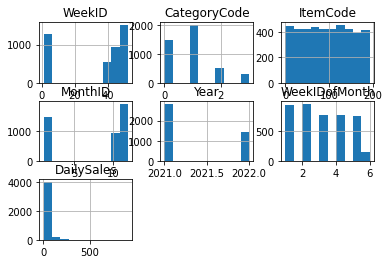

In [15]:
group_by_week.hist()
plt.show()

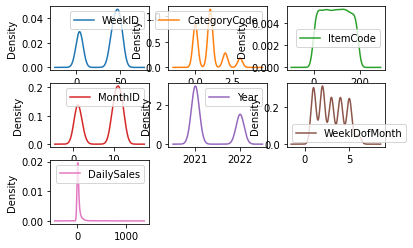

In [16]:
group_by_week.plot(kind='density', subplots=True, sharex=False, layout=(3, 3))
plt.show()

In [17]:
column_names = list(group_by_week.columns)
column_names

['WeekID',
 'CategoryCode',
 'ItemCode',
 'MonthID',
 'Year',
 'WeekIDofMonth',
 'DailySales']

[Text(0.5, 1.0, 'Correlation matrix\n')]

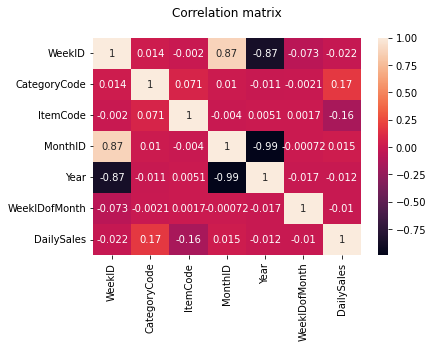

In [18]:
hm = sns.heatmap(group_by_week.corr(), annot = True)
hm.set(title = "Correlation matrix\n")

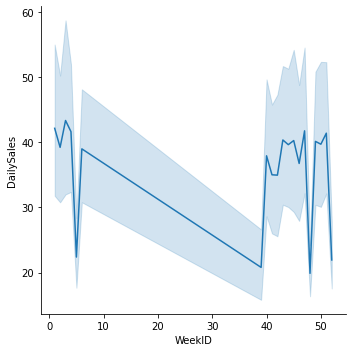

In [19]:
sns.relplot(x=group_by_week['WeekID'], y=group_by_week['DailySales'], kind='line')
plt.show()

<AxesSubplot:xlabel='MonthID', ylabel='DailySales'>

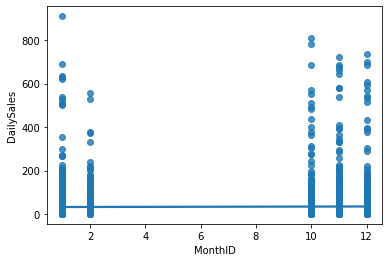

In [20]:
sns.regplot(x=group_by_week['MonthID'], y=group_by_week['DailySales'])

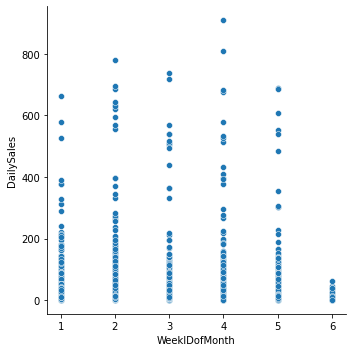

In [21]:
sns.relplot(x=group_by_week['WeekIDofMonth'], y=group_by_week['DailySales'])

In [22]:
def normalize_daily_sales(count):
    return (32 - count) / 32

In [23]:
X = pd.DataFrame()
X['week_id_of_year'] = group_by_week['WeekID']
X['week_id_of_month'] = group_by_week['WeekIDofMonth']
X['category_code'] = group_by_week['CategoryCode']
X['item_code'] = group_by_week['ItemCode']
X['month_id'] = group_by_week['MonthID']

Y = pd.DataFrame()
Y = group_by_week['DailySales']

In [24]:
X.head()

,week_id_of_year,week_id_of_month,category_code,item_code,month_id
0,1,2,0,0,1
1,1,2,0,1,1
2,1,2,0,5,1
3,1,2,0,6,1
4,1,2,0,10,1


In [25]:
X.dtypes

week_id_of_year     int64
week_id_of_month    int64
category_code       int64
item_code           int64
month_id            int64
dtype: object

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, shuffle=True)

In [27]:
X_train.skew()

week_id_of_year    -0.782609
week_id_of_month    0.188955
category_code       0.847219
item_code           0.001740
month_id           -0.601382
dtype: float64

In [31]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor().fit(X_train, Y_train)
reg.score(X_train, Y_train)

0.9555837938513224

In [34]:
predicted = reg.predict(X_test)

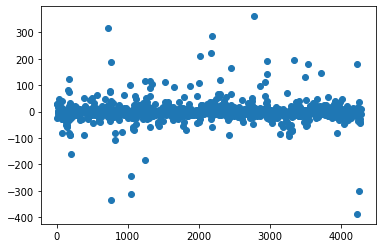

In [36]:
plt.plot(Y_test - predicted, marker='o', linestyle='')